## Tree


In [15]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key


def printInorder(root): # Inorder is Sorted
    if root:
        printInorder(root.left)
        print(root.val, end="  ")
        printInorder(root.right)


# Solve BST, Kth Smallest, Valid BST 
def inOrderIterative(root): 
    stack = []
    arr = []
    while (root) or (stack):
        while root:
            stack.append(root)
            root = root.left
        root = stack.pop()
        arr.append(root.val)
        root = root.right
    return arr


def printPreorder(root):
    if root:
        print(root.val, end="  ")
        printPreorder(root.left)
        printPreorder(root.right)


def printPostorder(root):
    if root:
        printPostorder(root.left)
        printPostorder(root.right)
        print(root.val, end="  ")


def rightViewTree(root, level: int = 0, stack: list = []) -> list:
    if not root:
        return
    if level == len(stack):
        stack.append(root.val)
    rightViewTree(root.right, level+1, stack)
    rightViewTree(root.left, level+1, stack)
    return stack


def leftViewTree(root, level: int = 0, stack: list = []) -> list:
    if not root:
        return
    if level == len(stack):
        stack.append(root.val)
    leftViewTree(root.left, level+1, stack)
    leftViewTree(root.right, level+1, stack)
    return stack


def maxDepth(root) -> int:
    if not root:
        return 0
    return 1 + max(maxDepth(root.left), maxDepth(root.right))


def buildTree() -> Node:
    root = Node(25)
    root.left = Node(15)
    root.right = Node(50)
    root.left.left = Node(10)
    root.left.right = Node(22)
    root.right.left = Node(35)
    root.right.right = Node(70)
    return root


root = buildTree()
print(inOrderIterative(root))
printInorder(root)
print()
print(f"Right View of Tree: {rightViewTree(root)}")
print(f"Left View of Tree: {leftViewTree(root)}")
print(f"Height of Tree: {maxDepth(root)}")


[10, 15, 22, 25, 35, 50, 70]
10  15  22  25  35  50  70  
Right View of Tree: [25, 50, 70]
Left View of Tree: [25, 15, 10]
Height of Tree: 3


Tree Visualization

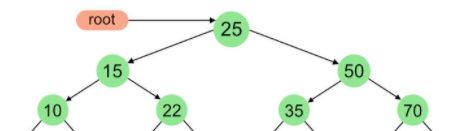


In [2]:
from collections import deque


def levelOrder(root) -> list[list[int]]:
    """
    Level Order Traversal - https://youtu.be/EoAsWbO7sqg?t=119
    """
    if root is None:
        return [[]]
    queue = deque([root])  # 1. Add root to queue
    levelOrderAns = []
    while queue:  # 2. Till Queue is empty
        subLevel = []
        n = len(queue)
        for i in range(n):  # 3. Do this 'n' times
            node = queue.popleft()  # 4. Remove node one by one from queue
            if node.left:  # 5. Check if left/right exists append to queue
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
            # 6. After processing the node append to sub level
            subLevel.append(node.val)
        levelOrderAns.append(subLevel)  # 7. Append that sub level to final ans
    return levelOrderAns


def topView(root) -> list[list[int]]:
    """
    Top View of Binary Tree - https://youtu.be/Et9OCDNvJ78
    """
    queue = deque([(root, 0)])
    lineNodeMap = dict()
    while len(queue) > 0:
        node, line = queue.popleft()
        if line not in lineNodeMap:
            lineNodeMap[line] = node.val
        if node.left:
            queue.append((node.left, line-1))
        if node.right:
            queue.append((node.right, line+1))

    # Python doesn't sort dict
    return [x[1] for x in sorted(lineNodeMap.items(), key=lambda x: x[0])]


print(f"Level Order: {levelOrder(root)}")
print(f"Top View: {topView(root)}")


Level Order: [[25], [15, 50], [10, 22, 35, 70]]
Top View: [10, 15, 25, 50, 70]


## Iterative DFS


In [3]:
def dfs(root):
    stack = [root]
    arr = []
    while stack:
        node = stack.pop()
        # OR if not root: continue (remove those if condn)
        arr.append(node.val)
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return arr


def preorder(root):
    print(dfs(root))


root = buildTree()
preorder(root)


[25, 15, 10, 22, 50, 35, 70]


## Root to leaf paths


In [4]:
def dfs(root):
    stack = [(root, "")]
    arr = []
    while stack:
        node, path = stack.pop()
        path += str(node.val) + " "
        if not node.left and not node.right:  # root
            arr.append(path.strip())
        if node.right:
            stack.append((node.right, path))
        if node.left:
            stack.append((node.left, path))
    return arr


def rootToLeafPaths(root):
    print(dfs(root))


root = buildTree()
rootToLeafPaths(root)


['25 15 10', '25 15 22', '25 50 35', '25 50 70']


## Symmetric Tree

https://leetcode.com/problems/symmetric-tree/


In [5]:
def dfs(root):
    stack = [(root.left, root.right)]
    while stack:
        left, right = stack.pop()
        if not left and not right:
            continue
        if not left or not right:
            return False
        if left.val != right.val:
            return False
        stack.append((left.left, right.right))
        stack.append((left.right, right.left))
    return True


def isMirror(root):
    if not root:
        return True
    return dfs(root)


## Sorted Array to Tree


In [6]:
def arrayToTree(arr: list) -> Node:
    if not arr:
        return None
    mid = len(arr) // 2
    root = Node(arr[mid])
    root.left = arrayToTree(arr[:mid])
    root.right = arrayToTree(arr[mid+1:])
    return root


arr = [1, 2, 3, 4, 5, 6, 7]
root = arrayToTree(arr)
printPreorder(root)


4  2  1  3  6  5  7  

## More on tree

1. Diameter of Binary Tree - [Link](https://leetcode.com/problems/diameter-of-binary-tree/)
1. Mirror Tree - [Link](https://practice.geeksforgeeks.org/problems/mirror-tree/1/)
1. Bottom View of Binary Tree - [Link](https://practice.geeksforgeeks.org/problems/bottom-view-of-binary-tree/1)
1. Expression Tree - [Link](https://practice.geeksforgeeks.org/problems/expression-tree/1/)
1. Diagonal Sum In Binary Tree - [Link](https://practice.geeksforgeeks.org/problems/diagonal-sum-in-binary-tree/1/)
1. Lowest Common Ancestor in a BST - [Link](https://practice.geeksforgeeks.org/problems/lowest-common-ancestor-in-a-bst/1/)
1. ZigZag Tree Traversal - [Link](https://practice.geeksforgeeks.org/problems/zigzag-tree-traversal/1)
1. Boundary Traversal of binary tree - [Link](https://practice.geeksforgeeks.org/problems/boundary-traversal-of-binary-tree/1)